In [1]:
# loading libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading data

df = pd.read_csv("Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
# pre-processing 

print(df.shape)
display(df.head())
print(df.dtypes)

(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [4]:
# checking for missing values
df.isnull().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
# checking for duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [6]:
# CLEANING STAGE

# dropping duplicated rows to avoid redundant customer observations and to ensure that each record represented a unique customer in the analysis

df = df.drop_duplicates()
df.duplicated().sum()




0

In [7]:

# dropping columns not needed


drop_cols = [
    "CustomerID",
    "Country", "State", "City", "Zip Code",
    "Lat Long", "Latitude", "Longitude",
    "Churn Score", "Churn Value", "CLTV"
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print(df.shape)


(7043, 22)


In [8]:
# Variables containing post-churn or customer outcome information were removed to prevent data leakage and ensure a realistic predictive modeling setup.

In [9]:
# checking data types

df.dtypes

Count                  int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Reason          object
dtype: object

In [10]:
df[["Monthly Charges", "Total Charges"]].dtypes


Monthly Charges    float64
Total Charges       object
dtype: object

In [73]:
# converting 'total charges' to a numeric data type

df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")


In [11]:
# verifying the change in data type

df['Total Charges'].head()
df.dtypes

Count                  int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Reason          object
dtype: object

In [12]:
df["Tenure Months"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

In [13]:
# ensuring customers with 0 tenure months also have 0 total charges

# Customers with zero tenure should have zero total charges
df.loc[df["Tenure Months"] == 0, "Total Charges"] = 0

In [14]:
# encoding target variable 'churn label'

df["Churn Label"] = df["Churn Label"].map({"Yes": 1, "No": 0})

y = df["Churn Label"]

In [15]:
df

,Count,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,1,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Moved
2,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,Moved
3,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Moved
4,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Female,No,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,NaN
7039,1,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,NaN
7040,1,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,NaN
7041,1,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,NaN


In [16]:
df["Churn Label"].value_counts(dropna=False)


Churn Label
0    5174
1    1869
Name: count, dtype: int64

In [17]:
# EXPLORATORY DATA ANALYSIS


In [18]:
# churn distribution

df["Churn Label"].value_counts()
df["Churn Label"].value_counts(normalize=True)


Churn Label
0    0.73463
1    0.26537
Name: proportion, dtype: float64

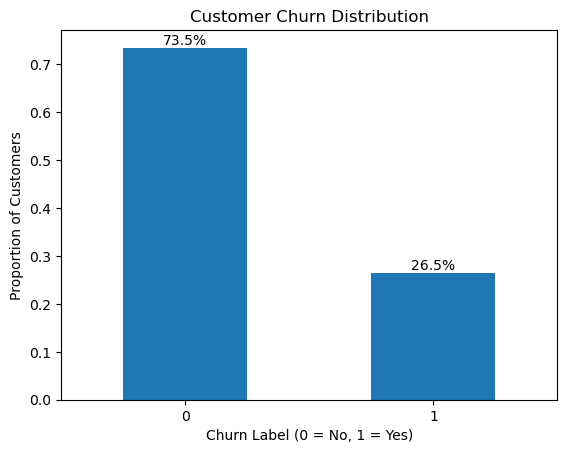

In [19]:
# 73% of telco customers do not churn, while 27% churn in America


# plotting on a graph
import matplotlib.pyplot as plt

# Get proportions
churn_dist = df["Churn Label"].value_counts(normalize=True)

# Plot
plt.figure()
churn_dist.plot(kind="bar")
plt.xlabel("Churn Label (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Customers")
plt.title("Customer Churn Distribution")
plt.xticks(rotation=0)
for i, v in enumerate(churn_dist.values):
    plt.text(i, v, f"{v:.1%}", ha="center", va="bottom")

plt.show()


In [20]:
# churn reason as percentages

df["Churn Reason"].value_counts(normalize=True)


Churn Reason
Attitude of support person                   0.102729
Competitor offered higher download speeds    0.101124
Competitor offered more data                 0.086677
Don't know                                   0.082397
Competitor made better offer                 0.074906
Attitude of service provider                 0.072231
Competitor had better devices                0.069556
Network reliability                          0.055110
Product dissatisfaction                      0.054575
Price too high                               0.052434
Service dissatisfaction                      0.047619
Lack of self-service on Website              0.047084
Extra data charges                           0.030498
Moved                                        0.028357
Lack of affordable download/upload speed     0.023542
Limited range of services                    0.023542
Long distance charges                        0.023542
Poor expertise of phone support              0.010701
Poor expertise 

In [21]:
# Filtering only churned customers
churned_customers = df[df["Churn Label"] == 1]

# Get top 5 churn reasons (percentage)
top5_churn_reasons = (
    churned_customers["Churn Reason"]
    .value_counts(normalize=True)
    .head(5)
    * 100
)

top5_churn_reasons


Churn Reason
Attitude of support person                   10.272873
Competitor offered higher download speeds    10.112360
Competitor offered more data                  8.667737
Don't know                                    8.239700
Competitor made better offer                  7.490637
Name: proportion, dtype: float64

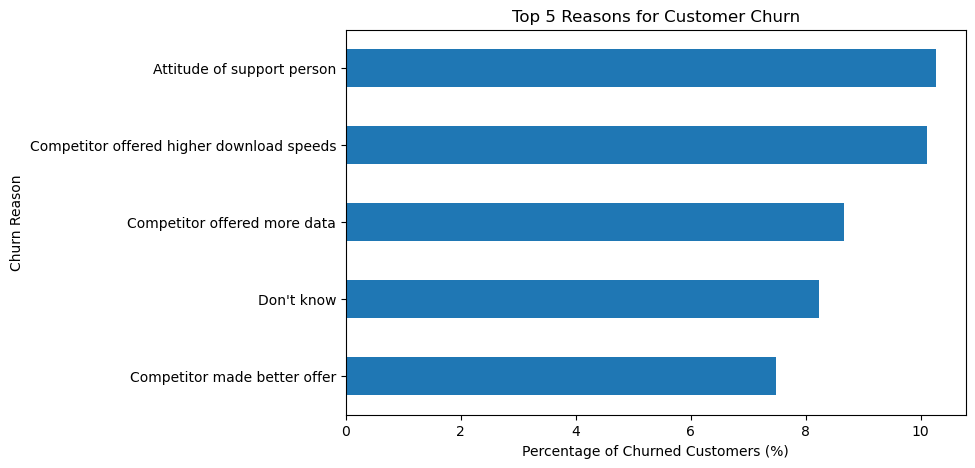

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
top5_churn_reasons.sort_values().plot(
    kind="barh",
)

plt.xlabel("Percentage of Churned Customers (%)")
plt.ylabel("Churn Reason")
plt.title("Top 5 Reasons for Customer Churn")
plt.show()


In [23]:
df = df.drop(columns=["Churn Reason"])


In [85]:
# Churn distribution across Contract type
# to identify churn distribution across all contract types

pd.crosstab(
    df["Contract"],
    df["Churn Label"],
    normalize="index"
)


Churn Label,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


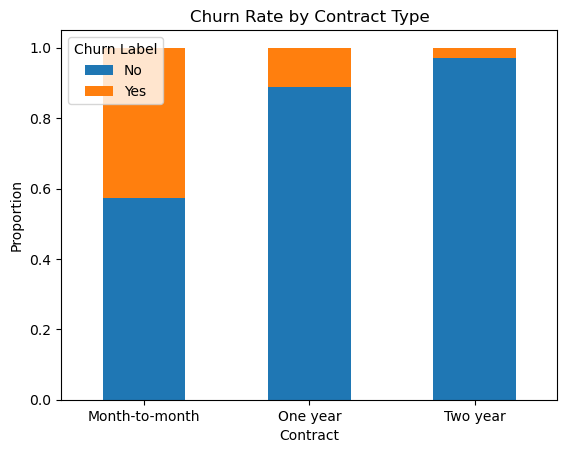

In [86]:
# plotting on graph

pd.crosstab(
    df["Contract"],
    df["Churn Label"],
    normalize="index"
).plot(kind="bar", stacked=True)

import matplotlib.pyplot as plt
plt.ylabel("Proportion")
plt.title("Churn Rate by Contract Type")
plt.legend(title="Churn Label", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


In [87]:
# Customers on month-to-month contracts exhibit the highest churn rate (approximately 43%), while churn decreases significantly for one-year contracts (around 11%) and is lowest for two-year contracts (below 3%). 
# This indicates that longer contract duration are associated with increased customer retention.


In [88]:
# Churn distribution for months tenure

In [89]:
df.groupby("Churn Label")["Tenure Months"].mean()



Churn Label
0    37.569965
1    17.979133
Name: Tenure Months, dtype: float64

<Axes: title={'center': 'Tenure Months'}, xlabel='Churn Label'>

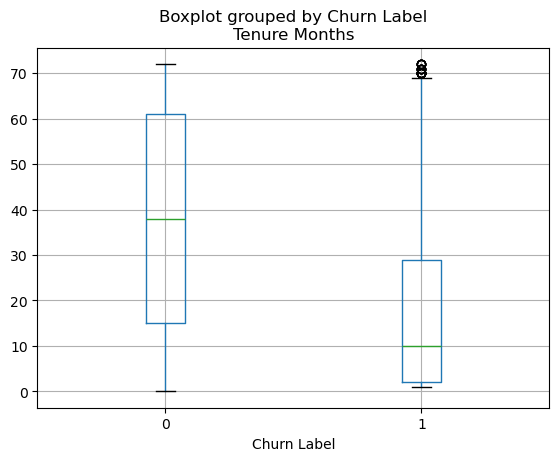

In [90]:
# plotting

df.boxplot(column="Tenure Months", by="Churn Label")


In [91]:
# did NOT churn : Higher median tenure (around mid–30 months)
# churned: Much lower median tenure (around 10 months), 
# Most churn occurs early, telcos can target early tenure customers for special ads, in order to attract long term service
# Business insight: Customers are most likely to churn early in the relationship


<Axes: title={'center': 'Monthly Charges'}, xlabel='Churn Label'>

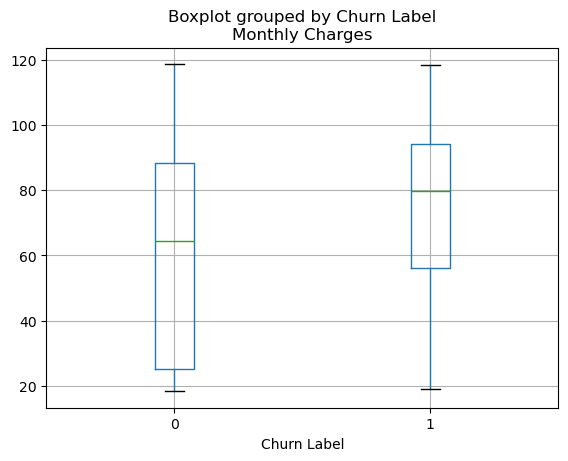

In [92]:
# Churn distribution by monthly charges

df.groupby("Churn Label")["Monthly Charges"].mean()
df.boxplot(column="Monthly Charges", by="Churn Label")


In [93]:
# customers who churn generally incur higher monthly charges compared to those who remain with the service. 
# The boxplot shows a higher median monthly charge for churned customers, suggesting that pricing and perceived cost-to-value balance may play a significant role in churn behaviour.

# Business insight: Price sensitivity is a major churn driver

In [94]:
# customer churn distribution by internet service type

pd.crosstab(
    df["Internet Service"],
    df["Churn Label"],
    normalize="index"
)


Churn Label,0,1
Internet Service,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [95]:
# For customers using each type of internet service, what percentage churned?

# DSL - 81% did not churn, 19% churned. Relatively low churn, DSL customers are fairly stable
# Fibre optic- 59% did not churn, 41% churned. Very high churn, Nearly 2 out of every 5 fiber customers churn
# No Internet service - 93% did not churn, 7% churned. Lowest churn, These customers are extremely stable

#Business insight: customers on premium internet services may have higher expectations or greater price sensitivity, making them more likely to churn.

In [96]:
# Customer churn distribution by payment method

pd.crosstab(
    df["Payment Method"],
    df["Churn Label"],
    normalize="index"
)


Churn Label,0,1
Payment Method,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [97]:
# Customers using electronic checks are far more likely to churn,  Automatic payment methods are associated with lower churn

In [98]:
# Correlation for numeric features 

df[["Tenure Months", "Monthly Charges", "Total Charges", "Churn Label"]].corr()


,Tenure Months,Monthly Charges,Total Charges,Churn Label
Tenure Months,1.000000,0.247900,0.826178,-0.352229
Monthly Charges,0.247900,1.000000,0.651174,0.193356
Total Charges,0.826178,0.651174,1.000000,-0.198324
Churn Label,-0.352229,0.193356,-0.198324,1.000000


In [99]:
# a moderate negative correlation of -0.35 for tenure months indicates that as tenure increases, churn reduces. Customers who stay longer are less likely to churn.
# a weak positive relation of 0.19 for monthly charges indicates that higher monthly charges may lead to churn. Not a strong relationship
# a weak negative relation of -0.19 for total charges indicates that Customers with higher accumulated charges (longer relationship) are less likely to churn


# Correlation analysis indicates a moderate negative relationship between customer tenure and churn, confirming that longer-serving customers are less likely to churn. 
# Monthly charges show a weaker positive association with churn, suggesting that higher costs may contribute to customer attrition. 
# Additionally, tenure months and total charges exhibit a strong positive correlation, indicating potential multicollinearity and justifying careful feature selection during model development.


In [100]:

# defining x and y

X = df.drop(columns=["Churn Label"]) # independent variables
y = df["Churn Label"]  # dependent variable



In [101]:
X

,Count,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40
7039,1,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7040,1,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7041,1,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [102]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64

In [103]:
# identifying categorical and numeric variables

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')
Numeric columns: Index(['Count', 'Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='object')


In [104]:
# encoding categorical variables in one code

X_encoded = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True,
    dtype=int
)


In [105]:
X_encoded.shape
X_encoded.head()


,Count,Tenure Months,Monthly Charges,Total Charges,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,70.70,151.65,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,8,99.65,820.50,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0
3,1,28,104.80,3046.05,0,0,1,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,1,49,103.70,5036.30,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0


In [106]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [108]:
# Logistic regression (classification)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [109]:
# model evaluation

from sklearn.metrics import classification_report, confusion_matrix

y_pred = lr_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[914 121]
 [161 213]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [110]:
# plotting results

import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report as dict
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Keep only relevant columns
report_df = report_df[['precision', 'recall', 'f1-score', 'support']]

report_df


,precision,recall,f1-score,support
0,0.850233,0.883092,0.866351,1035.000000
1,0.637725,0.569519,0.601695,374.000000
accuracy,0.799858,0.799858,0.799858,0.799858
macro avg,0.743979,0.726305,0.734023,1409.000000
weighted avg,0.793825,0.799858,0.796101,1409.000000


In [111]:
# 914 customers correctly predicted as not churning
# 213 customers correctly predicted as churning

# 121 churn false alarms (predicted churn, but didn’t)
# 161 missed churners (actual churners predicted as no)

# The Logistic Regression model achieved an overall accuracy of 80%. 
# The model performed strongly in identifying non-churning customers, with a recall of 88%. For churn prediction, the model achieved a recall of 57%, indicating that over half of the actual churners were correctly identified. 
# While classification performance is satisfactory, the results highlight the limitations of a purely binary approach, motivating the use of a regression-based churn risk model to capture varying levels of churn likelihood.



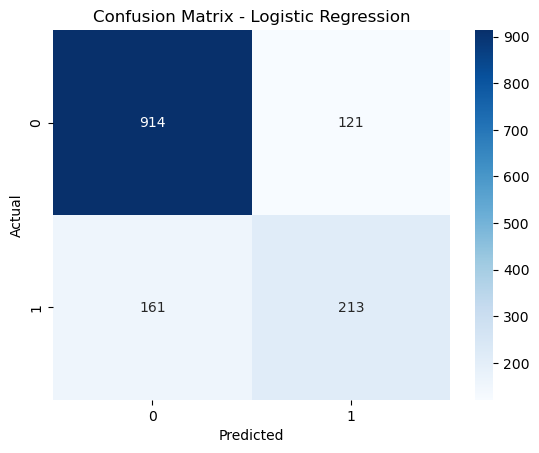

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [113]:
# Model performance was further illustrated using a confusion matrix, which shows that the Logistic Regression model performs well in identifying non-churning customers, while detecting a substantial proportion of churners.

In [114]:
# REGRESSION BASED MODEL PREDICTION using the same logistic algorithm

In [115]:
# predicting churn probabilities

# Predict probability of churn (class = 1)
churn_probabilities = lr_model.predict_proba(X_test_scaled)[:, 1]

churn_probabilities

array([0.07563586, 0.67224147, 0.09872457, ..., 0.17991319, 0.0053309 ,
       0.0022921 ])

In [116]:
# Evaluating using Regression metrics

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, churn_probabilities)
r2 = r2_score(y_test, churn_probabilities)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.1359516170735584
R-squared (R²): 0.30274054536306527


In [117]:
# a Mean Squared Error of 0.136 and an R² value of approximately 0.30, indicating that the model explains a meaningful proportion of the variability in customer churn behaviour. 
# While churn is complex and influenced by multiple factors, the continuous churn risk scores provide more nuanced insights than binary classification, supporting better-informed decision-making.

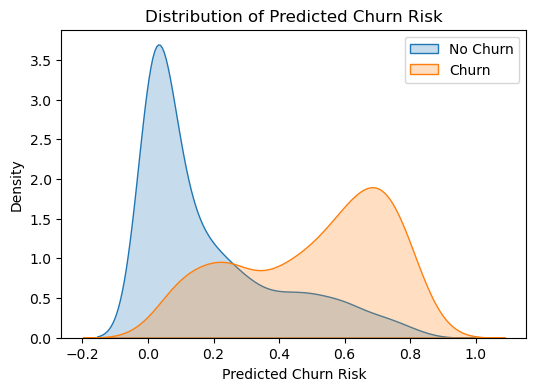

In [171]:
# distribution of predicted churn risk using regression model

import seaborn as sns

plt.figure(figsize=(6,4))
sns.kdeplot(churn_probabilities[y_test == 0], label="No Churn", fill=True)
sns.kdeplot(churn_probabilities[y_test == 1], label="Churn", fill=True)
plt.xlabel("Predicted Churn Risk")
plt.title("Distribution of Predicted Churn Risk")
plt.legend()
plt.show()


In [172]:
# The chart shows that customers who churned generally received higher churn risk scores than those who did not, indicating that the model successfully separates high-risk and low-risk customers.

In [173]:
# K-means Clustering Model 

# selecting features to cluster

cluster_features = df[[
    "Tenure Months",
    "Monthly Charges",
    "Total Charges"
]]



In [174]:
# standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)


/opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/joblib/externals/loky/backend/context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


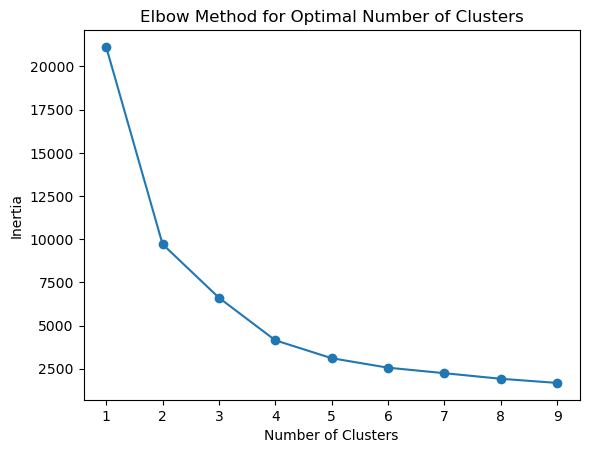

In [175]:
# Elbow Method to determine optimum number of clusters 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()


In [179]:
# per the graph K=4 is ideal

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(cluster_scaled) +1



In [180]:
# interpreting clusters 

df.groupby("Cluster")[[
    "Tenure Months",
    "Monthly Charges",
    "Total Charges",
    "Churn Label"
]].mean()


,Tenure Months,Monthly Charges,Total Charges,Churn Label
Cluster,,,,
1,53.574762,34.822602,1831.478263,0.050130
2,15.352734,80.730401,1243.594136,0.482363
3,59.419321,93.272245,5536.350574,0.155091
4,10.214915,31.775661,302.152378,0.246624


In [181]:
# cluster and churn status

pd.crosstab(df["Cluster"], df["Churn Label"], normalize="index")


Churn Label,0,1
Cluster,,
1,0.949870,0.050130
2,0.517637,0.482363
3,0.844909,0.155091
4,0.753376,0.246624


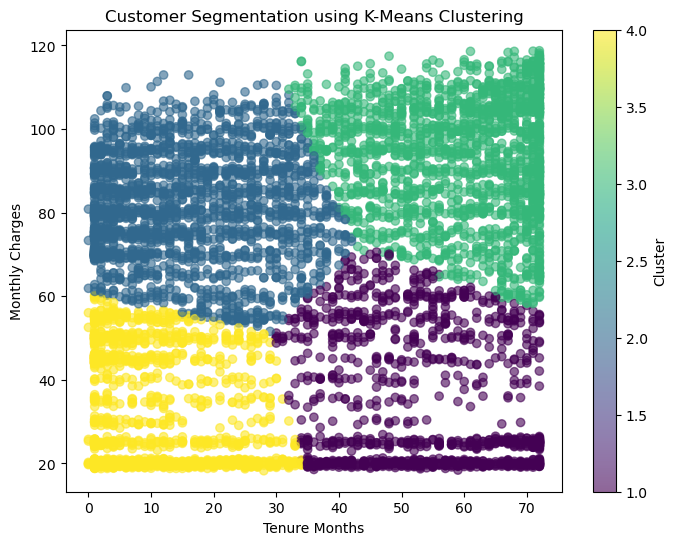

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    df["Tenure Months"],
    df["Monthly Charges"],
    c=df["Cluster"],
    alpha=0.6
)

plt.xlabel("Tenure Months")
plt.ylabel("Monthly Charges")
plt.title("Customer Segmentation using K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# Cluster 1 (purple)
# Long tenure, Low monthly charges
# Very low churn (~5%)
#Interpretation: Loyal, long-term customers on affordable plans.

# Cluster 2 (blue)
# Short tenure, High monthly charges
# Very high churn (~48%)
# Interpretation: New customers paying high prices are most likely to churn.
# This is the highest-risk segment.

# Cluster 3 (green)
# Long tenure, High monthly charges
# Moderate churn (~15%)
# Interpretation: High-value customers who stay longer but may churn if dissatisfied.

# Cluster 4 (yellow)
# Short tenure, Low monthly charges
# Moderate churn (~25%)
# Interpretation: Low-commitment, low-revenue customers with unstable retention.

# This demonstrates how unsupervised learning can uncover hidden customer patterns that are not directly visible in classification models.